# Second Order Models

### 1. Step Response

- Overdamped $\zeta > 1 $

- Critically damped $\zeta = 1 $

- Underdamped $ 0 <\zeta< 1 $

- Undamped Oscillations $ \zeta = 0 $

==============================================================

1.1 Overdamped $\zeta > 1 $

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

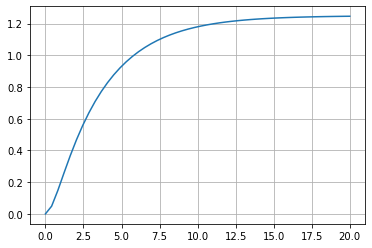

In [16]:
# define function
def overdamped(K, tau, zeta):
    t = np.linspace(0,20)
    tau_1 = tau/(zeta-np.sqrt(zeta**2-1))
    tau_2 = tau/(zeta+np.sqrt(zeta**2-1))
    
    y = K*(1-((tau_1*np.exp(-t/tau_1))-(tau_2*np.exp(-t/tau_2)))/(tau_1-tau_2))
    plt.plot(t,y)
    plt.grid()
    plt.show()
# main
interact(overdamped, K=(0.5,2),tau=(0.5,2),zeta=(1.01,2));

1.2 Critically damped $\zeta = 1 $

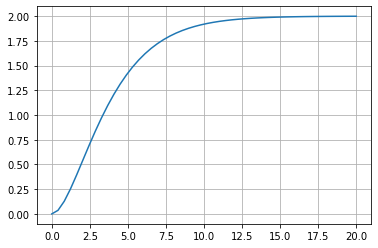

In [15]:
#define function

def CriticallyDamped(K,tau):
    t = np.linspace(0,20)
    y = K*(1-(1+t/tau)*np.exp(-t/tau))
    plt.plot(t,y)
    plt.grid()
    plt.show()
CriticallyDamped(K=2,tau=2)

1.3 Underdamped $0< \zeta < 1 $

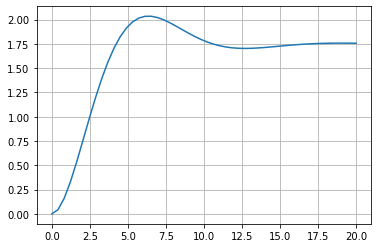

<function __main__.underdamped(K, tau, zeta)>

In [20]:
# define function
def underdamped(K,tau,zeta):
    t = np.linspace(0,20)
    omega = np.sqrt(1-zeta**2)/tau
    cos_term = np.cos(omega*t)
    sin_term = np.sin(omega*t)
    y = K*(1-np.exp(-zeta*t/tau)*(cos_term+(zeta/np.sqrt(1-zeta**2))*sin_term))
    plt.plot(t,y)
    plt.grid()
    plt.show()
interact(underdamped, K=(0.5,3), tau=(0.5,3), zeta=(0,0.999))

1.4 Undamped $\zeta = 0 $

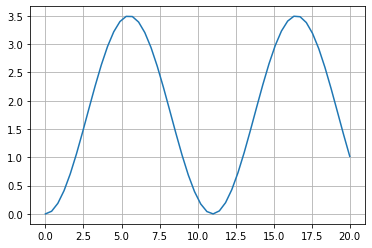

<function __main__.Undamped(K, tau, zeta=0)>

In [37]:
def Undamped(K,tau,zeta=0):
    t = np.linspace(0,20)
    omega = np.sqrt(1-zeta**2)/tau
    y = K*(1-np.cos(omega*t))
    plt.plot(t,y)
    plt.grid()
    plt.show()
    
interact(Undamped, K=(0.5,3),tau=(0.5,3))

# Simulation

In [24]:
# import library
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from ipywidgets import interact

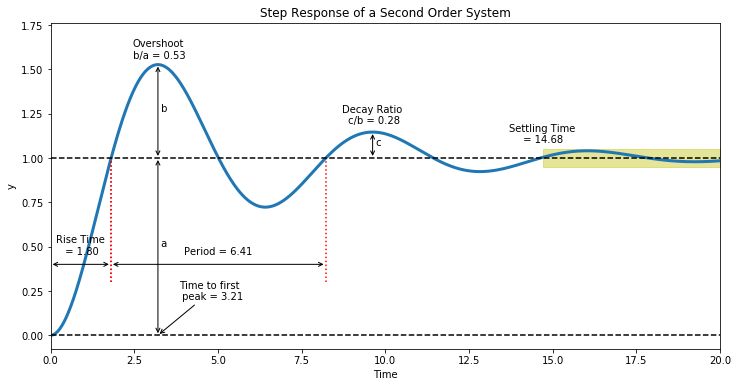

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

def simulation(yref=0, U=1, K=1, tau=1, zeta=0.2):

    def deriv(X,t):
        y,v = X
        ydot = v
        vdot = -(y-yref)/tau/tau - 2*zeta*v/tau + K*U/tau/tau
        return[ydot,vdot]

    # simulation  
    t = np.linspace(0,20*tau,1000)
    y = odeint(deriv, [yref,0], t)[:,0]
    
    # plot steady state line and bounds
    plt.figure(figsize=(12,6))

    
    # plot solution
    plt.plot(t,y,lw=3)
    plt.title('Step Response of a Second Order System')
    plt.xlabel('Time')
    plt.ylabel('y')
    
    # plot limits
    plt.ylim(plt.ylim()[0],1.1*plt.ylim()[1])
    plt.xlim(t[0],t[-1])
    dy = np.diff(plt.ylim())
    
    # arrow props
    ap1 = dict(arrowstyle="->")
    ap2 = dict(arrowstyle="<->")

    if zeta < 1:
        #overshoot
        os = np.exp(-np.pi*zeta/np.sqrt(1-zeta**2))
        
        # time to first peak
        tp = np.pi*tau/np.sqrt(1-zeta**2)
        yp = (1+os)*K*U + yref
          
        plt.text(tp,yp+0.02*dy,"Overshoot\n b/a = {0:0.2f}".format(os), ha='center')
        plt.annotate('',xy=(tp,K*U+yref),xytext=(tp,yp),arrowprops=ap2)
        plt.text(tp,(K*U+yref+yp)/2,' b')
        plt.annotate('',xy=(tp,yref),xytext=(tp,K*U+yref),arrowprops=ap2)
        plt.text(tp,K*U/2+yref,' a')
        plt.annotate("Time to first\n peak = {0:.2f}".format(tp),
                    xy=(tp,yref), xytext=(1.2*tp,0.2*K*U+yref),arrowprops=ap1)

        # rise time
        tr = t[np.where(np.diff(np.sign(y-yref-K*U))*np.sign(K*U)>0)[0][0]]
        if tr < plt.xlim()[1]:
            plt.plot([tr,tr],[0.3*K*U+yref,K*U+yref],'r:')
            plt.annotate('',xy=(plt.xlim()[0],0.4*K*U+yref),xytext=(tr,0.4*K*U+yref),
                         arrowprops=ap2)
            plt.text(plt.xlim()[0]+tr/2,0.42*K*U+yref+0.02*dy,
                    'Rise Time\n = {0:.2f}'.format(tr),ha='center')
        
        # period
        P = 2*np.pi*tau/np.sqrt(1-zeta**2)
        if tr + P < plt.xlim()[1]:
            plt.plot([tr,tr],[0.3*K*U+yref,K*U+yref],'r:')
            plt.plot([tr+P,tr+P],[0.3*K*U+yref,K*U+yref],'r:')
            plt.annotate('',xy=(tr,0.4*K*U+yref),xytext=(tr+P,0.4*K*U+yref),arrowprops=ap2)
            plt.text(tr+P/2,0.42*K*U+yref+0.02*dy,'Period = {0:.2f}'.format(P), ha='center')
        
        # second peak
        if tp + P < plt.xlim()[1]:
            plt.annotate('',xy=(tp+P,K*U+yref),xytext=(tp+P,K*U*(1+os**3)+yref),
                        arrowprops=ap2)
            plt.text(tp+P,K*U*(1+os**3/2)+yref,' c')
            plt.text(tp+P,K*U*(1+os**3)+yref+0.02*dy,
                    'Decay Ratio\n c/b = {0:.2f}'.format(os**2),va='bottom',ha='center')
        
        # settling time
        ts = -np.log(0.05)*np.sqrt(1-zeta**2)*tau/zeta
        if ts < plt.xlim()[1]:
            plt.fill_between(t[t>ts],0.95*K*U+yref,1.05*K*U+yref,alpha=0.4,color='y')
            plt.text(ts,1.05*K*U+yref+0.02*dy,
                     'Settling Time\n = {0:.2f}'.format(ts),ha='center')

    #graph        
    plt.plot(plt.xlim(),[yref,yref],'k--')
    plt.plot(plt.xlim(),[K*U+yref,K*U+yref],'k--')
    
interact(simulation, yref = (-10,10,0.1), U=(0.01,5,0.01), 
         K = (-5,5,0.01), zeta=(0.01,3,0.01), tau = (0.1,5.0,0.01));